# Exploring the relationship between Sleeping quality and Caffeine intake

Sleeping is an important action which is necessary for every mankind to rule a better life. One day is consist with 24 hours. From that hours, 8 hours are recommended to sleep by elites in this respective field. So it is much more important. Sleeping is a medicine for cure many kind of diseases. The quality of sleep might have determined by so many factors. By the analysis of the dataset “The comprehensive sleep and health metrics”(https://www.kaggle.com/datasets/uom190346a/sleep-and-health-metrics) we are going to look on some factors which are affecting the sleep quality. The insights that we are going to see at the end of this process will convey something valuable to the community and to the society.

When assessing the quality of sleep, it's common to use a scale from 1 to 10 to quantify how well a person slept. Here’s a general guide on what different ratings might represent:

1.	1-2: Very Poor Sleep
o	Extremely restless, frequent awakenings, or inability to fall asleep. You may feel very tired and unrefreshed upon waking.

2.	3-4: Poor Sleep
o	Significant difficulty falling or staying asleep. You may experience broken sleep patterns and feel tired during the day.


3.	5-6: Fair Sleep
o	Some disturbances or issues, but overall, sleep might be adequate. You might still feel somewhat tired or not fully refreshed in the morning.

4.	7-8: Good Sleep
o	Generally restful with only occasional disturbances. You usually wake up feeling reasonably refreshed and ready for the day.

5.	9-10: Excellent Sleep
o	Consistently restful and undisturbed sleep. You wake up feeling fully refreshed and energized, and your sleep patterns are stable

Here we are going to make predictions by using LinearRegression model.


# Prepare data

first of all we sholud have to import all of the respective liabraries for data handling, cleaning, model building and to communicate result.

First we import <code>pandas</code>, Pandas makes data analysis effortless by allowing you to clean, manipulate, and visualize data using its powerful DataFrame and Series structures.
Then import <code>matplotlib.pyplot</code>, Matplotlib.pyplot is commonly used for creating a wide range of static, animated, and interactive visualizations in Python, including line plots, bar charts, and scatter plots.

Import <code>sklearn</code>, Scikit-learn (sklearn) is widely used for implementing machine learning algorithms and performing tasks such as classification, regression, clustering, and model evaluation in Python.

From scikit-Learn importing <code>mean_absolute_error</code> and <code>LinearRegression</code>, which are used to quantify the average magnitude of errors in predictions by calculating the average of the absolute differences between predicted and actual values, and  model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data respectively.

Also imported <code>seaborn</code> used for creating informative and attractive statistical graphics in Python, including heatmaps, violin plots, and regression plots, which help in visualizing and understanding complex datasets.

# Import

In [4]:
# importing the neccessary liabraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

Impoted the necessary liabraries

# Explore

After that we have introduced a wrangle fuction to read the csv file into a 
dataframe by using the filepath.

The <code>wrangle</code> function is often used in data preprocessing to clean, transform, and prepare raw data for analysis by handling missing values, encoding categorical variables, and scaling features.

Here we can directly apply the read csv command for importing the csv files as dataframe instead using wrangle fuction.


In [5]:
#through the wrangle function importing the data as df.
def wrangle(filepath):
    data = pd.read_csv(filepath)
    df = pd.DataFrame(data)
    return df

assinged the filepath to the <code>wrangle</code> fuction, which will create the dataframe that we actually want

In [6]:
df = wrangle("/Users/user/Desktop/wearable_tech_sleep_quality_1.csv.csv")
df.head()

,Heart_Rate_Variability,Body_Temperature,Movement_During_Sleep,Sleep_Duration_Hours,Sleep_Quality_Score,Caffeine_Intake_mg,Stress_Level,Bedtime_Consistency,Light_Exposure_hours
0,79.934283,37.199678,1.324822,4.638289,1.0,107.624032,2.771837,0.657037,7.933949
1,67.234714,36.962317,1.855481,6.209422,1.0,104.658589,3.738138,0.144464,6.992699
2,82.953771,36.529815,1.207580,6.879592,10.0,0.000000,3.115880,0.642949,7.655250
3,100.460597,36.176532,1.692038,10.331531,1.0,116.990981,3.904008,0.453255,9.429463
4,65.316933,36.849112,0.106385,8.334830,1.0,223.282908,4.571699,0.641492,10.555713


Now we have our beautiful dataframe about the  comprehensive sleep and health metrics with 1000 rows and 9 columns.
In the data exploration phase, first we have to consider the **Nan values**.Eliminating NaN values is essential when dealing with linear regression models, as the presence of missing data can disrupt calculations and prevent the model from training correctly, leading to inaccurate or incomplete results. Eliminate the column with more than 50% of nan values

In [7]:
#There is no missing values in the dataset.
df.isnull().sum()

Heart_Rate_Variability    0
Body_Temperature          0
Movement_During_Sleep     0
Sleep_Duration_Hours      0
Sleep_Quality_Score       0
Caffeine_Intake_mg        0
Stress_Level              0
Bedtime_Consistency       0
Light_Exposure_hours      0
dtype: int64

But in our dataset there is no longer any nan values. So all the columns are eligible for further process

Other one thing is that, we have to consider the **Low or high cardinality** of **categorical** columns.Eliminating categorical columns with high cardinality in linear regression models is important because they can lead to excessive complexity and overfitting, while columns with low cardinality may not provide enough information, both of which can negatively impact the model’s performance and interpretability

But in our dataset there is no columns with categorical features.

so that we next turn to **leakages** among features.that is, features that were created using our target or that would give our model information that it won't have access to when it's deployed. Here in our dataset no kind of leaky features are noticed.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Heart_Rate_Variability  1000 non-null   float64
 1   Body_Temperature        1000 non-null   float64
 2   Movement_During_Sleep   1000 non-null   float64
 3   Sleep_Duration_Hours    1000 non-null   float64
 4   Sleep_Quality_Score     1000 non-null   float64
 5   Caffeine_Intake_mg      1000 non-null   float64
 6   Stress_Level            1000 non-null   float64
 7   Bedtime_Consistency     1000 non-null   float64
 8   Light_Exposure_hours    1000 non-null   float64
dtypes: float64(9)
memory usage: 70.4 KB


Other thing is the **multicolinearity** among features.
Multicollinearity refers to a situation in statistical modeling, particularly in linear regression, where two or more independent variables are highly correlated with each other. This can cause issues because it makes it difficult to determine the individual effect of each variable on the dependent variable, leading to unstable coefficient estimates and reduced interpretability of the model. For that we check the correlation between features.

In [9]:
#Correlation between features
corr = df.drop(columns = ["Sleep_Quality_Score"]).corr()
corr

,Heart_Rate_Variability,Body_Temperature,Movement_During_Sleep,Sleep_Duration_Hours,Caffeine_Intake_mg,Stress_Level,Bedtime_Consistency,Light_Exposure_hours
Heart_Rate_Variability,1.000000,-0.040400,0.022129,-0.013321,-0.008619,-0.035387,0.048199,-0.016585
Body_Temperature,-0.040400,1.000000,-0.011199,-0.054698,0.024757,-0.001531,0.054962,0.012436
Movement_During_Sleep,0.022129,-0.011199,1.000000,0.021586,0.002097,-0.028713,-0.039408,0.001739
Sleep_Duration_Hours,-0.013321,-0.054698,0.021586,1.000000,0.033951,0.011492,-0.002974,0.004894
Caffeine_Intake_mg,-0.008619,0.024757,0.002097,0.033951,1.000000,0.013555,0.056263,0.011756
Stress_Level,-0.035387,-0.001531,-0.028713,0.011492,0.013555,1.000000,-0.004930,-0.001623
Bedtime_Consistency,0.048199,0.054962,-0.039408,-0.002974,0.056263,-0.004930,1.000000,0.026786
Light_Exposure_hours,-0.016585,0.012436,0.001739,0.004894,0.011756,-0.001623,0.026786,1.000000


This is the dataframe showing the correlation between all features. We can figure it out by using the seaborn

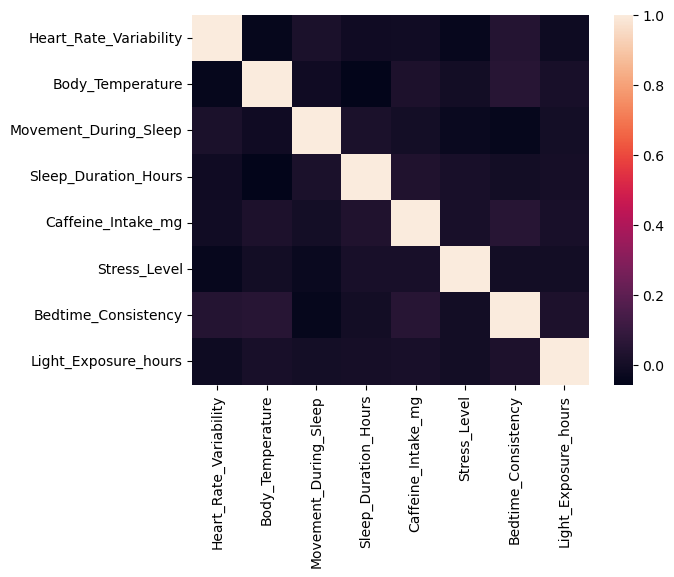

In [10]:
fig = sns.heatmap(corr)

A **heatmap** is used to visualize the intensity of data values across a matrix, with color gradients representing different magnitudes, making it easier to identify patterns and correlations in complex datasets. Here it is clear that there is no multicolinearity among features.

After that we should considering the correlation between independent features and depended feature

In [11]:
corr_ = df.corr()
corr_

,Heart_Rate_Variability,Body_Temperature,Movement_During_Sleep,Sleep_Duration_Hours,Sleep_Quality_Score,Caffeine_Intake_mg,Stress_Level,Bedtime_Consistency,Light_Exposure_hours
Heart_Rate_Variability,1.000000,-0.040400,0.022129,-0.013321,0.026911,-0.008619,-0.035387,0.048199,-0.016585
Body_Temperature,-0.040400,1.000000,-0.011199,-0.054698,-0.025720,0.024757,-0.001531,0.054962,0.012436
Movement_During_Sleep,0.022129,-0.011199,1.000000,0.021586,-0.064108,0.002097,-0.028713,-0.039408,0.001739
Sleep_Duration_Hours,-0.013321,-0.054698,0.021586,1.000000,0.042104,0.033951,0.011492,-0.002974,0.004894
Sleep_Quality_Score,0.026911,-0.025720,-0.064108,0.042104,1.000000,-0.721968,-0.036226,-0.076633,-0.007448
Caffeine_Intake_mg,-0.008619,0.024757,0.002097,0.033951,-0.721968,1.000000,0.013555,0.056263,0.011756
Stress_Level,-0.035387,-0.001531,-0.028713,0.011492,-0.036226,0.013555,1.000000,-0.004930,-0.001623
Bedtime_Consistency,0.048199,0.054962,-0.039408,-0.002974,-0.076633,0.056263,-0.004930,1.000000,0.026786
Light_Exposure_hours,-0.016585,0.012436,0.001739,0.004894,-0.007448,0.011756,-0.001623,0.026786,1.000000


Here we can see the correlation. we can use a heatmap again to visualize the relation

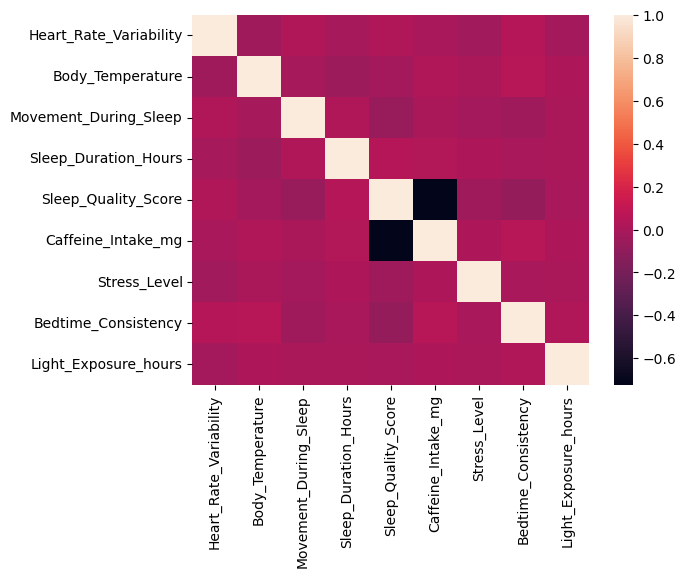

In [12]:
fig_ = sns.heatmap(
    corr_
)

Now we can see here a negative correlation between "Caffeine_Intake_mg" and "Sleep_Quality_Score". And no other features are making significant correlation with the variable "Sleep_Quality_Score". So we are making another dataframe named "df1" with 2 variables ("Caffeine_Intake_mg" & "Sleep_Quality_Score").

In [13]:
df1 = df[["Caffeine_Intake_mg", "Sleep_Quality_Score"]]
df1.head()

,Caffeine_Intake_mg,Sleep_Quality_Score
0,107.624032,1.0
1,104.658589,1.0
2,0.000000,10.0
3,116.990981,1.0
4,223.282908,1.0


making a scatter plot for df1.

Text(0.5, 1.0, 'Relationship in between Caffeine_Intake_mg & Sleep_Quality_Score')

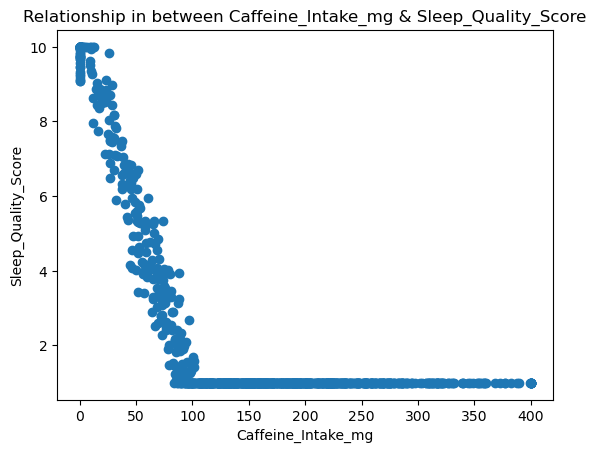

In [14]:
#Scatter plot for the variables 'Caffeine_Intake_mg' & 'Sleep_Quality_Score'
plt.scatter(data=df1,
           x = "Caffeine_Intake_mg",
           y = "Sleep_Quality_Score")
plt.xlabel("Caffeine_Intake_mg")
plt.ylabel("Sleep_Quality_Score")
plt.title("Relationship in between Caffeine_Intake_mg & Sleep_Quality_Score")

Here we can completly see the negative relationship in between 	Caffeine_Intake_mg and Sleep_Quality_Score. When the intake of Caffeine increases the Sleep_Quality_Score began to fall. So that is the negative relation. But one thing we can see here in the scatter plot is the Sleep_Quality_Score became minimum by the Caffeine_Intake_mg reach to 100mg, it does not going down after 100mg. The Caffeine_Intake_mg is recorded upto 400mg. But eventhough in 400mg the Sleep_Quality_Score is in that minimum level. This part of information will not give any kind of use for our model rather it will decrease our model performence. Therefore, we should eliminate the obsevations with the Caffeine_Intake_mg value more than 150mg. For that, we can include a mask.

In [15]:
mask = (df1["Caffeine_Intake_mg"] < 150)
df1 = df1[mask]

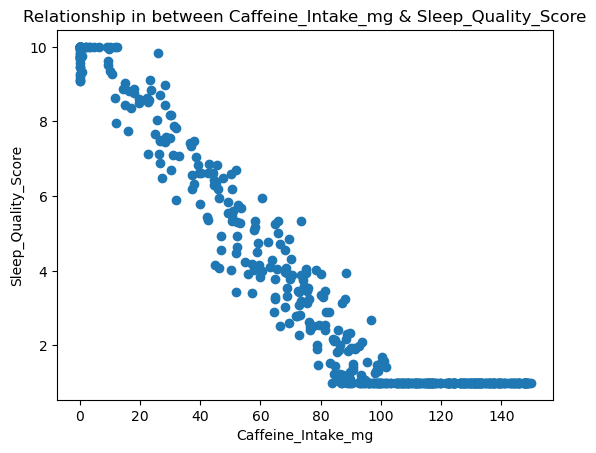

In [16]:
plt.scatter(
    x=df1["Caffeine_Intake_mg"],
    y=df1["Sleep_Quality_Score"]
)
plt.xlabel("Caffeine_Intake_mg")
plt.ylabel("Sleep_Quality_Score")
plt.title("Relationship in between Caffeine_Intake_mg & Sleep_Quality_Score");

# Split

Now we can split our data vertically as **feature matrix** and our **target vector**. In machine learning, the feature matrix contains the input variables or predictors used for training the model, while the target vector represents the output variable or the values the model aims to predict. Here the feature matrix is termed as "X" and target vector as "y".

In [17]:
#Vertical split of the two variables as 'feature matric(X)' and 'Target vector(y)'.
feature = ["Caffeine_Intake_mg"]
X = df1[feature]
target = "Sleep_Quality_Score"
y = df1[target]

After that we make horizontal split of our data as train and test data.The **train-test** split of data allows for evaluating model performance by training on one subset (train) and validating on a separate subset (test), which helps to assess how well the model generalizes to unseen data and prevents overfitting.

In [18]:
#Horizontal split of the variable as 'X_train', 'y_train', 'X_test' and 'y_test'.
cut_off = int(len(X) * 0.8)
X_train, y_train = X.head(cut_off), y.head(cut_off)
X_test, y_test = X.tail(len(X) - cut_off), y.tail(len(X) - cut_off)


# Build Model

# Baseline

Calculating the "baseline" for our model. A **baseline** in machine learning refers to a simple model or metric used as a reference point to evaluate the performance of more complex models, helping to determine if the advanced models offer a meaningful improvement.The baseline is typically calculated by using a straightforward approach, such as predicting the mean or median of the target variable for regression tasks or the most frequent class for classification tasks, providing a benchmark against which more sophisticated models can be compared. Here we are using the mean value of the target vector for making the baseline.


In [19]:
#Calculating the 'mean absolute error' for the 'y_train' and 'meanmean_base_line'.
mean_base_line = [y_train.mean()] * len(y_train)
baseline_mae = mean_absolute_error(y_train, mean_base_line)
print("baseline mean absolute error:" , baseline_mae)

baseline mean absolute error: 3.0685150048593783


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


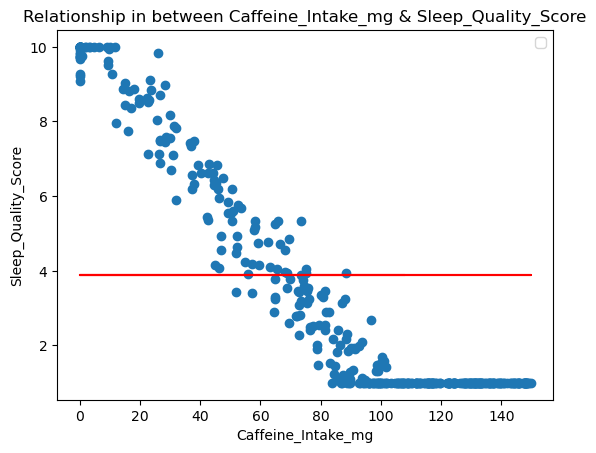

In [20]:
plt.scatter(X_train, y_train)
plt.xlabel("Caffeine_Intake_mg")
plt.ylabel("Sleep_Quality_Score")
plt.title("Relationship in between Caffeine_Intake_mg & Sleep_Quality_Score")
plt.legend();
plt.plot(X_train["Caffeine_Intake_mg"],
        mean_base_line,
        color = "red",
        label = "linear model");

# Iterate

Here we are using a **LinearRegression** model, which A linear regression model is a statistical approach used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data, allowing for predictions and insights into how changes in the predictors affect the target variable.

In [21]:
#Defining the 'LinearRegression' model and fitting the model with the 'X_train' and 'y_train'.
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Making predictions by using our model with 'X_train' values.

In [22]:
#Making the predictions with X_train.
predictions = model.predict(X_train)

# Evaluate

Calculating the **mean absolute error** for the true y_train values and predictions.

In [23]:
#Mean absolute error for the 't_train' and 'pred'.
pred_mae = mean_absolute_error(y_train, predictions)
print("mean absolute error for train data:" , pred_mae)

mean absolute error for train data: 0.9223114642226146


Here we can see the value for our mean absolute error is smaller than the values that we get with baseline. Comparing the MAE of your model to the baseline MAE helps gauge whether your model improves upon a simple prediction strategy. A reduction in MAE demonstrates that the model effectively captures patterns in the data, leading to better predictive accuracy.


For now we can use our model on test data.Making predictions for test data is important because it allows you to evaluate how well your model generalizes to new, unseen data, ensuring that it performs accurately and reliably in real-world scenarios.

In [24]:
#Making predictions of the 'X_test' by using the 'model'.
test_pred = model.predict(X_test)

In [25]:
#mae for test variables
mae_test = mean_absolute_error(y_test, test_pred)
print("mean absolute error for test data:", mae_test)

mean absolute error for test data: 0.859183251541859


Here also the mean absolute error is perfect....

# Communicate Result

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


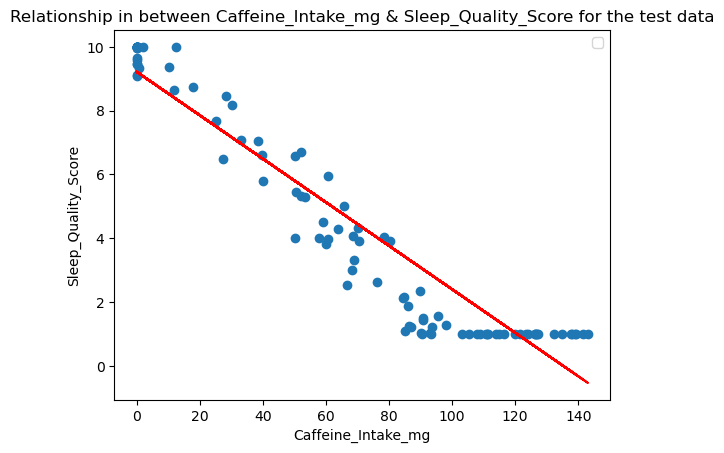

In [30]:
#scatter plot of 'X_test' and 'y_test' combined with the line which showing the predicted 'y' values for each 'X' variables.
plt.scatter(X_test, y_test)
plt.xlabel("Caffeine_Intake_mg")
plt.ylabel("Sleep_Quality_Score")
plt.title("Relationship in between Caffeine_Intake_mg & Sleep_Quality_Score for the test data")
plt.legend();
plt.plot(X_test["Caffeine_Intake_mg"],
       test_pred,
        color = "red",
        label = "linear model");


Here in the scatter plot we can see the scatter points constructed by using the X_test and y_test values. And the red line shows our predictions by using the model for every X_test value.

A linear regression model predicts the dependent variable 𝑦 using the equation 
y=𝛽0+𝛽1𝑥1+𝛽2𝑥2+...βpxp+ϵ where β0 is the intercept β1,β 2,…,βp are the coefficients for the independent variables  𝑥1,𝑥2,…,𝑥𝑝x1,x 2,…,x p, and 𝜖 represents the error term.
 

In [27]:
#Intercept of the equation.
intercept = model.intercept_
print("intercet:" , intercept)

intercet: 9.213145094016873


In [28]:
#Coefficient of the equation
coefficient = model.coef_
print("coefficient:" , coefficient)

coefficient: [-0.06816105]


In [29]:
print(f"sleep quality score = {intercept} + {coefficient} * Caffeine Intake mg")

sleep quality score = 9.213145094016873 + [-0.06816105] * Caffeine Intake mg


Here we can see the equation for calculating the dependent variable named "sleep quality score". A negative relation is complitely expressing this equation.

A negative relationship between sleep quality score and caffeine intake suggests that as caffeine consumption increases, sleep quality tends to decrease, likely because caffeine is a stimulant that can disrupt sleep patterns, delay sleep onset, and reduce overall sleep duration; additionally, higher caffeine intake can lead to increased wakefulness during the night and interfere with the natural sleep cycle, potentially exacerbating sleep disturbances and contributing to poorer overall sleep quality.